# **Demand Forecasting Project**

---
Author : Muhammad Alfi Rosyadi

Email : muhammadalfirosyadi1998@gmail.com

LinkedIn : https://www.linkedin.com/in/muhammad-alfi-rosyadi-440ab9193


# **ARIMA and Seasonal ARIMA**

---

**Auto Regressive Integrated Moving Averages**


*   Visualize the time series data
*   Make time series data stationary
*   Plot the Correlation and Autocorrelation charts
*   Construct the ARIMA Model or seasonal ARIMA based on the data
*   Use model to make predictions



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Historical Product Demand.csv')

In [3]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [4]:
df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [6]:
df.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

df.reset_index(drop = True)
df.isnull().sum()

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 47.5+ MB


In [10]:
#Change Order_Demand into int

df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] = df['Order_Demand'].astype('int64')

<ipython-input-10-62f1f94b5760>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
<ipython-input-10-62f1f94b5760>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.5+ MB


In [12]:
df.describe(include='all')

<ipython-input-12-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1.037336e+06
unique,2160,4,33,1729,NaN
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,NaN
freq,16936,764447,470266,2075,NaN
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,4.949384e+03
std,NaN,NaN,NaN,NaN,2.907344e+04
min,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,2.000000e+01


In [13]:
# Only focus on Jan 2012 until Dec 2016

out_years = (df['Date'] <= '2012-01-01') & (df['Date'] >= '2016-12-31')

df_filtered = df[~out_years]

In [14]:
# Change the demand in monthly order

df_filtered.describe(include='all')

<ipython-input-14-73c6ed8bb530>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_filtered.describe(include='all')


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1.037336e+06
unique,2160,4,33,1729,NaN
top,Product_1359,Whse_J,Category_019,2013-09-27 00:00:00,NaN
freq,16936,764447,470266,2075,NaN
first,NaN,NaN,NaN,2011-01-08 00:00:00,NaN
last,NaN,NaN,NaN,2017-01-09 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,4.949384e+03
std,NaN,NaN,NaN,NaN,2.907344e+04
min,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,2.000000e+01


In [15]:
# sum order demand in monthly

grouped_df = df_filtered.groupby(['Product_Code', 'Warehouse', 'Product_Category', df_filtered['Date'].dt.to_period("M")])['Order_Demand'].sum().reset_index()


In [16]:
grouped_df.describe(include='all')

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,136026,136026,136026,136026,1.360260e+05
unique,2160,4,33,68,NaN
top,Product_2138,Whse_J,Category_019,2015-11,NaN
freq,243,81768,37338,2446,NaN
mean,NaN,NaN,NaN,NaN,3.774406e+04
std,NaN,NaN,NaN,NaN,2.581957e+05
min,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,4.800000e+01
50%,NaN,NaN,NaN,NaN,5.530000e+02
75%,NaN,NaN,NaN,NaN,7.000000e+03


# Splis Dataset Based On **Product_Category**

---

I am gonna make some predictions of product_code using **ARIMA** and **SARIMAX**

I take **Product_2138** in 4 warehouse and try to forecast the demand in the future


In [17]:
product2138_df = grouped_df[grouped_df['Product_Code'] == 'Product_2138']

In [18]:
#Split dataset into every warehouse
product2138_df['Warehouse'].unique()

array(['Whse_A', 'Whse_C', 'Whse_J', 'Whse_S'], dtype=object)

In [19]:
#Warehouse A,C,J,S

prod_2138_A = product2138_df[product2138_df['Warehouse'] == 'Whse_A']
prod_2138_C = product2138_df[product2138_df['Warehouse'] == 'Whse_C']
prod_2138_J = product2138_df[product2138_df['Warehouse'] == 'Whse_J']
prod_2138_S = product2138_df[product2138_df['Warehouse'] == 'Whse_S']


In [20]:
prod_2138_A.columns.values

array(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'], dtype=object)

In [21]:
columns_to_drop = ['Product_Code', 'Warehouse', 'Product_Category']
df_final = prod_2138_A.drop(columns=columns_to_drop)
df_final.set_index('Date', inplace=True)
df_final.drop('2011-12', axis=0, inplace=True)
df_final.tail()

,Order_Demand
Date,
2016-08,190
2016-09,88
2016-10,626
2016-11,330
2016-12,88


<Axes: xlabel='Date'>

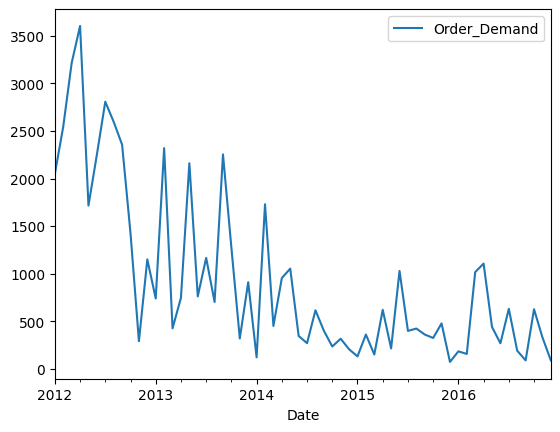

In [22]:
df_final.plot()

In [23]:
### Testing for stationary

from statsmodels.tsa.stattools import adfuller

In [24]:
test_result = adfuller(df_final['Order_Demand'])

In [25]:
#H0 : is non stationary
#H1 : is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test Stats', 'p-value', '#Lags Used', 'Number of observations used']
  for value, label in zip(result, labels):
    print(label + ' : ' +str(value))
  if result[1] <= 0.05:
    print("strong evidence agains the null hypothesis(H0), reject the null hypothesis")
  else:
    print("weak evidence against the null hypothesis")

In [26]:
adfuller_test(df_final['Order_Demand'])

ADF Test Stats : -3.1400610601587515
p-value : 0.023727071467241904
#Lags Used : 6
Number of observations used : 53
strong evidence agains the null hypothesis(H0), reject the null hypothesis


In [27]:
# Import ARIMA

! pip install pmdarima

from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [28]:
fit = auto_arima(
                 df_final['Order_Demand'],
                 start_p=1,
                 start_q=1,
                 max_p=5,
                 max_q=5,
                 m=12,
                 start_P=0,
                 seasonal=True,
                 d=None,
                 D=1,
                 trace=True,
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=True
)

fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=783.386, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=769.634, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=773.729, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=769.356, Time=1.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=776.292, Time=1.88 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=764.102, Time=1.32 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=763.650, Time=0.41 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=768.204, Time=0.32 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(4, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -366.791
Date:                            Thu, 21 Dec 2023   AIC                            753.582
Time:                                    02:53:28   BIC                            772.083
Sample:                                01-31-2012   HQIC                           760.544
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    125.0405    150.635      0.830      0.406    -170.198     420.280
ar.L1         -1.5023      0.190     -7.912      0.000      -1.874      -1.130
ar.L2         -1.2737      0.235     -5.409      0.000      -1.735      -0.812
ar.L3         -1.0028      0.242     -4.139      0.000      -1.478      -0.528
ar.L4         -0.5596      0.149     -3.743      0.000      -0.853      -0.267
ma.L1          0.7914      0.246      3.214      0.001       0.309       1.274
ar.S.L12      -0.0406      0.585     -0.069      0.945      -1.187       1.106
ar.S.L24      -0.1715      0.371     -0.462      0.644      -0.898       0.556
ma.S.L12      -0.8442      2.032     -0.416      0.678      -4.826       3.138
sigma2      2.559e+05   3.89e+05      0.658      0.511   -5.07e+05    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.95   Prob(JB):                         0.53
Heteroskedasticity (H):               0.43   Skew:                            -0.32
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
len(df_final['Order_Demand'])

train=df_final['Order_Demand'].iloc[:48]
test=df_final['Order_Demand'].iloc[48:]

In [30]:
model = SARIMAX(train, order=(4,1,1), seasonal_order=(2,1,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Order_Demand   No. Observations:                   48
Model:             SARIMAX(4, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -275.592
Date:                            Thu, 21 Dec 2023   AIC                            569.184
Time:                                    02:56:11   BIC                            583.183
Sample:                                01-31-2012   HQIC                           574.017
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4497      0.202     -7.176      0.000      -1.846      -1.054
ar.L2         -1.1525      0.336     -3.428      0.001      -1.811      -0.494
ar.L3         -0.8948      0.383     -2.336      0.019      -1.645      -0.144
ar.L4         -0.5293      0.304     -1.740      0.082      -1.125       0.067
ma.L1          0.9889      2.519      0.393      0.695      -3.947       5.925
ar.S.L12      -0.1922      0.663     -0.290      0.772      -1.492       1.108
ar.S.L24      -0.3221      0.429     -0.751      0.453      -1.162       0.518
ma.S.L12      -0.8686      2.887     -0.301      0.764      -6.527       4.789
sigma2      2.286e+05   1.26e-05   1.81e+10      0.000    2.29e+05    2.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.35
Prob(Q):                              0.92   Prob(JB):                         0.31
Heteroskedasticity (H):               0.33   Skew:                            -0.39
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.01e+27. Standard errors may be unstable.
"""

In [31]:
#Obtain predict value

start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(4,1,1),(2,1,1,12) Predictions')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


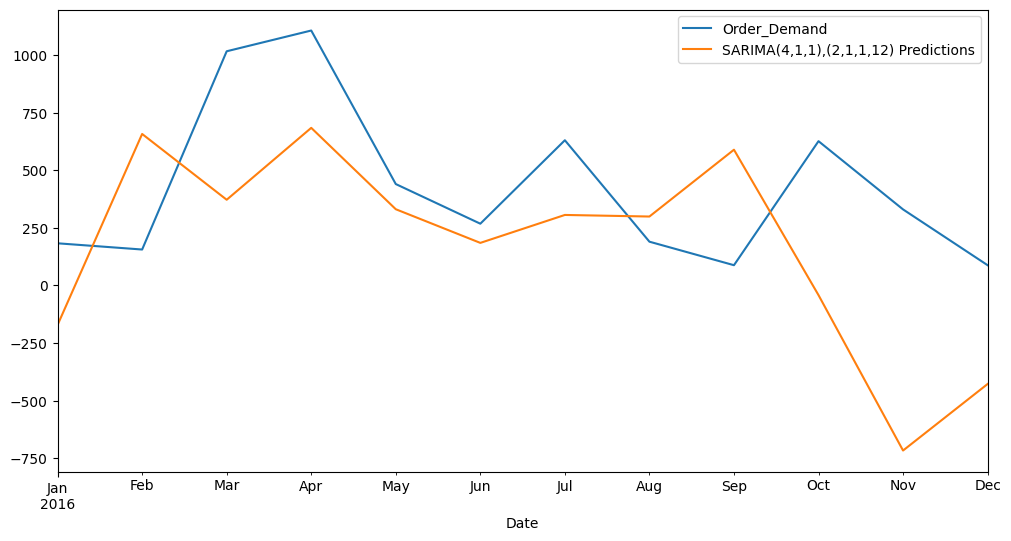

In [32]:
ax = test.plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)

In [34]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(test, predictions))
print(f'SARIMA(4,1,1)(2,1,1,12) RMSE Error: {error:11.10}')
print('Std of Test data:  ', df_final['Order_Demand'].std())

SARIMA(4,1,1)(2,1,1,12) RMSE Error: 513.3159041
Std of Test data:   889.0443297940675


In [35]:
model = SARIMAX(df_final['Order_Demand'], order=(4,1,1), seasonal_order=(2,1,1,12))
results = model.fit()
fcast = results.predict(len(df_final['Order_Demand']), len(df_final['Order_Demand'])+4, typ='levels').rename('SARIMA(4,1,1)(2,1,1,12) Forecast')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


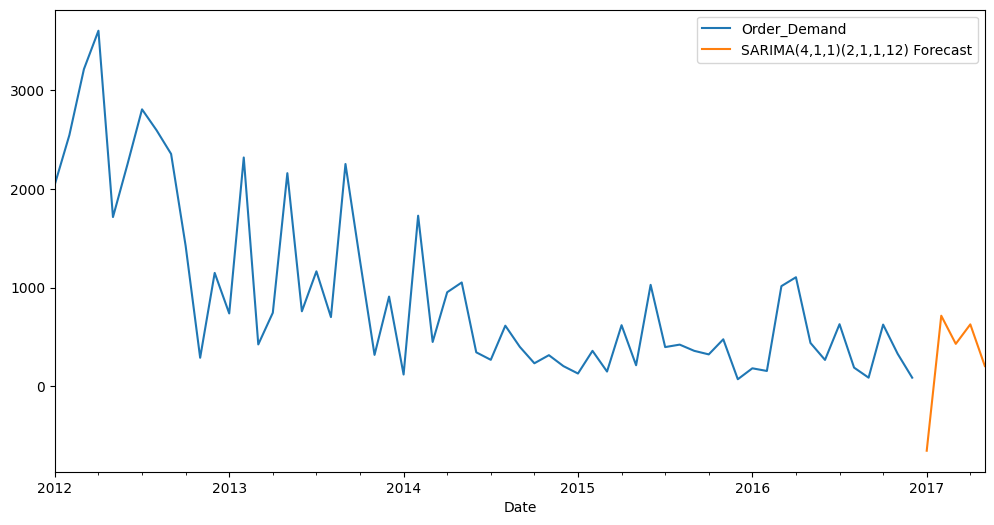

In [36]:
ax = df_final['Order_Demand'].plot(legend=True, figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x, tight=True')

In [38]:
#The forecast of Product 2138 of warehouse A